In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [108]:
companies = pd.read_csv('C:\\Users\\Anubhav\\MLShit\\Machine Learning Full\\Linear Regression\\1000_Companies.csv')
X = companies.iloc[:, :-1].values
Y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

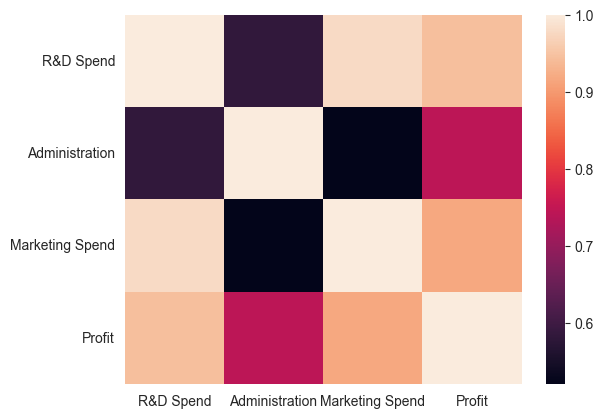

In [109]:
# data visualisation
# Building the corealation matrix

numeric_companies = companies.select_dtypes(include=[np.number])
sns.heatmap(numeric_companies.corr())

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoding only to categorical column (State)
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), [3])
    ],
    remainder='passthrough')

X = column_transformer.fit_transform(companies.iloc[:, :-1])

In [111]:
X = X[:, 1:]  # Avoiding dummy variable trap

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [113]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [114]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 89367.45616735,  88004.03124811,  94471.07549883, 176130.70148887,
        83413.96004914, 110571.77052674, 131980.90458126,  91050.07174837,
       164592.22578901,  53683.30649356,  66529.01692395, 151018.45736339,
       126488.8220895 ,  58917.34788371, 177083.12536118,  75319.21481674,
       118702.97107056, 164144.74669324, 171467.57609701, 182062.76954331,
       118993.06699255,  85247.15018025, 181441.96643238,  83722.41382013,
       104581.35583269, 100809.41380087,  53929.94908384,  56885.95072797,
        68475.05069478, 209552.22974679, 121233.32972377, 111299.80561441,
       101488.56363594, 138412.13998384,  63549.04546043, 108433.09541113,
       186008.03541058, 171892.84397986, 175094.18963918, 118126.36841624,
        96732.45029194, 165022.52117452, 107299.62512652,  50655.28484514,
       116968.8730889 ,  58212.039361  , 158867.8033466 ,  78999.76402067,
       160178.88780223, 131591.58346382, 185329.74371237, 175059.0100745 ,
        93322.16053642,  

In [115]:
regressor.coef_

array([-2.73274122e+02,  5.27896578e-01,  8.45343994e-01,  1.06399819e-01])

In [116]:
regressor.intercept_

np.float64(-51479.39925091408)

In [117]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.9115541316406403